# Figure generation

In [1]:
from IPython.display import Image, display, SVG
import svgutils.transform as sg
import numpy as np
from lxml import etree
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Directory of output figures
# local_directory = "/home/alexandra/Documents/Data/Generic_expression_patterns/"
output_directory = "output/"
os.makedirs(output_directory, exist_ok=True)

## Function to plot

In [3]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    panel = sg.fromfile(filename)

    panel_size = (
        np.round(float(panel.root.attrib["width"][:-2]) * 1.33, 0),
        np.round(float(panel.root.attrib["height"][:-2]) * 1.33, 0),
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)

    return panel

## Figure 1

In [4]:
# Create panels for figure 1
panel_1a = make_figure_panel(
    "fig1A_core_stability_workflow.svg",
    scale_x_input=3.5,
    scale_y_input=3.5,
    x_loc=30,
    y_loc=10,
)
panel_1b = make_figure_panel(
    "../3_core_core_analysis/pao1_similarity_scores_dist_spell.svg",
    scale_x_input=1,
    scale_y_input=1,
    x_loc=30,
    y_loc=500,
)
panel_1c = make_figure_panel(
    "../3_core_core_analysis/stability_percent_match_homolog.svg",
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=500,
    y_loc=500,
)

original: (279.0, 395.0)
scaled:(976.5, 1382.5)
original: (590.0, 472.0)
scaled:(590.0, 472.0)
original: (803.0, 632.0)
scaled:(562.0999999999999, 442.4)


In [5]:
panel_1a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_1b_label = sg.TextElement(10, 500, "B", size=18, weight="bold", font="Verdana")
panel_1c_label = sg.TextElement(500, 500, "C", size=18, weight="bold", font="Verdana")

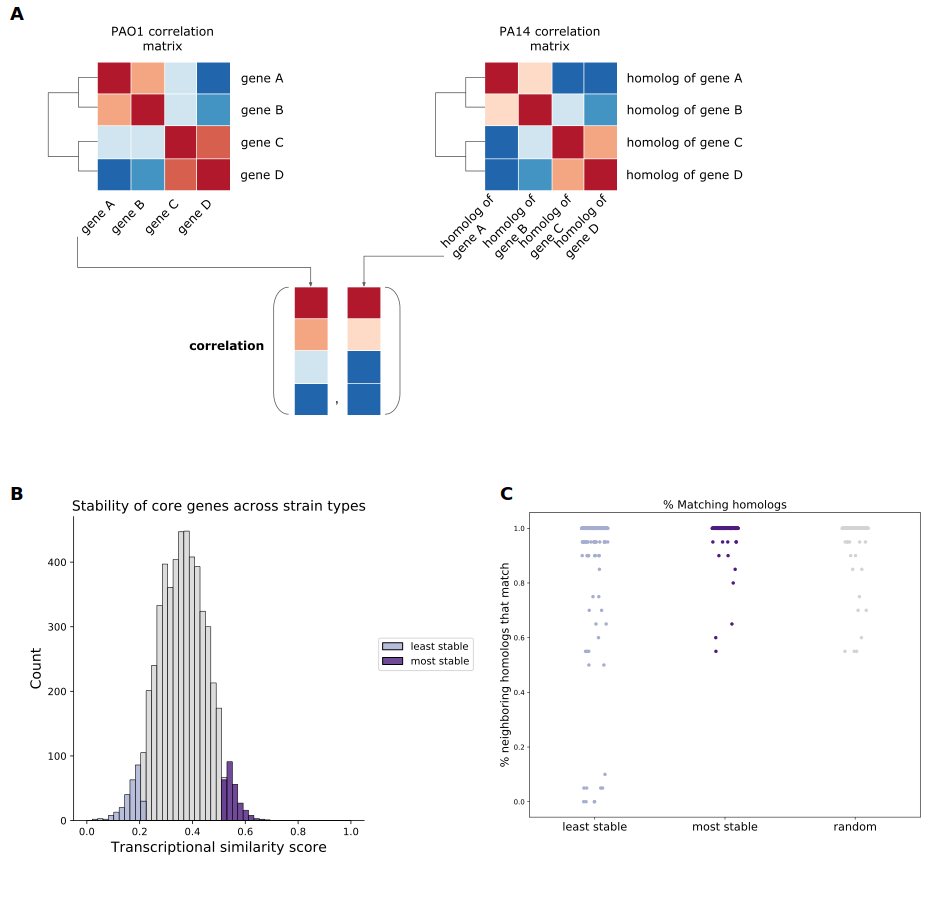

In [6]:
figure_1 = sg.SVGFigure("950", "900")
figure_1.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_1a,
        panel_1b,
        panel_1c,
        panel_1a_label,
        panel_1b_label,
        panel_1c_label,
    ]
)
display(SVG(figure_1.to_str()))

In [7]:
# save generated SVG files
figure_1.save("output/figure_1.svg")

## Figure 2

In [8]:
# Create panels for figure 2
panel_2a = make_figure_panel(
    "fig2A_core_acc_calc.svg", scale_x_input=4, scale_y_input=4, x_loc=30, y_loc=10
)
panel_2b_right = make_figure_panel(
    "../5_core_acc_analysis/PAO1_stablility_expression_relationships_operon_corrected_spell.svg",
    scale_x_input=1,
    scale_y_input=1,
    x_loc=30,
    y_loc=500,
)
panel_2b_left = make_figure_panel(
    "../5_core_acc_analysis/PA14_stability_expression_relationships_operon_corrected_spell.svg",
    scale_x_input=1,
    scale_y_input=1,
    x_loc=450,
    y_loc=500,
)
panel_2c = make_figure_panel(
    "../5_core_acc_analysis/core_genes_correlated_with_exo.svg",
    scale_x_input=1,
    scale_y_input=1,
    x_loc=30,
    y_loc=900,
)

original: (279.0, 395.0)
scaled:(1116.0, 1580.0)
original: (717.0, 448.0)
scaled:(717.0, 448.0)
original: (732.0, 448.0)
scaled:(732.0, 448.0)
original: (652.0, 339.0)
scaled:(652.0, 339.0)


In [9]:
panel_2a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_2b_label = sg.TextElement(10, 500, "B", size=18, weight="bold", font="Verdana")
panel_2c_label = sg.TextElement(10, 900, "C", size=18, weight="bold", font="Verdana")

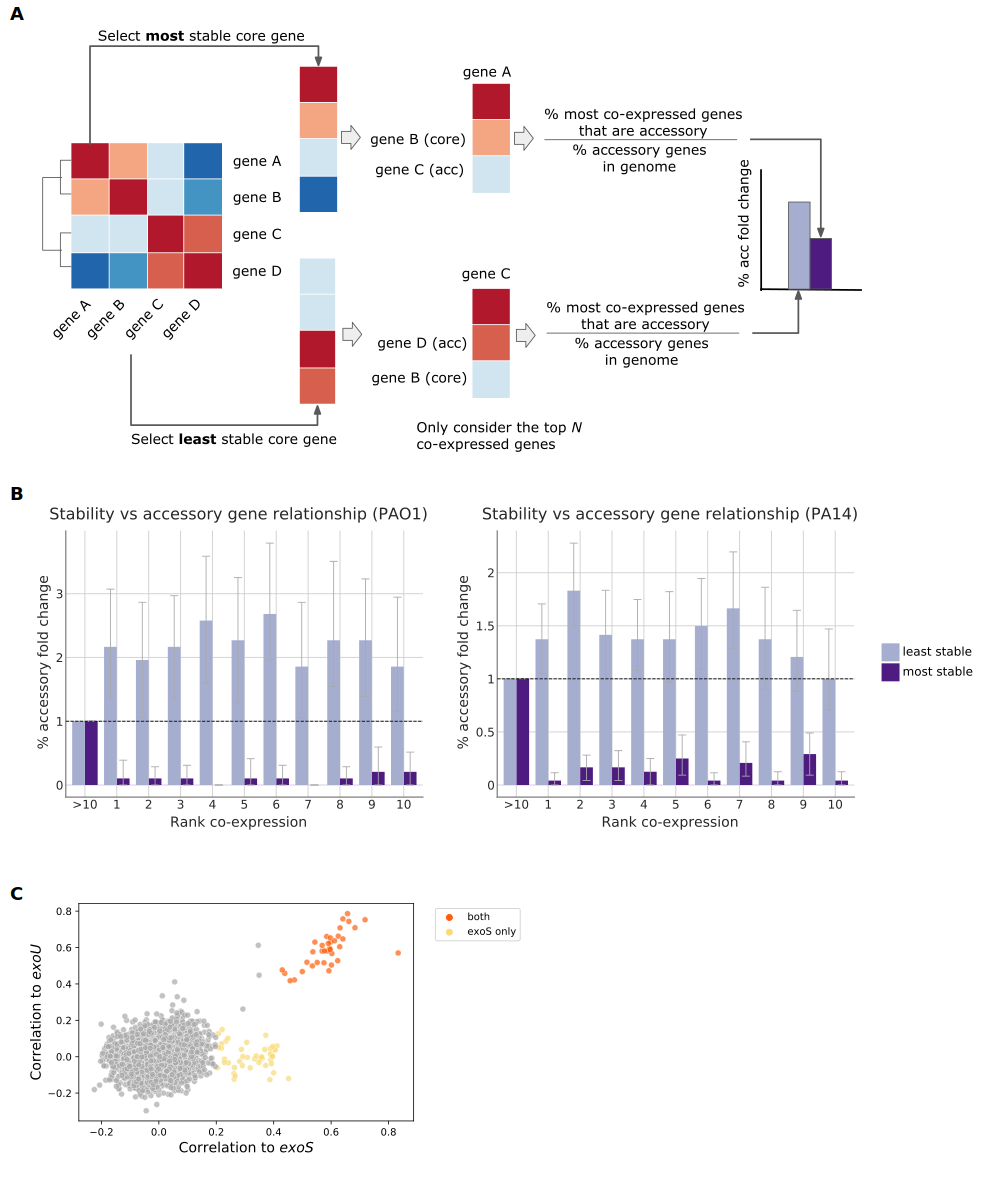

In [10]:
figure_2 = sg.SVGFigure("1000", "1200")
figure_2.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_2a,
        panel_2b_right,
        panel_2b_left,
        panel_2c,
        panel_2a_label,
        panel_2b_label,
        panel_2c_label,
    ]
)
display(SVG(figure_2.to_str()))

In [11]:
# save generated SVG files
figure_2.save("output/figure_2.svg")

## Output png version

In [12]:
!inkscape --export-png=output/figure_1.png output/figure_1.svg
!inkscape --export-png=output/figure_2.png output/figure_2.svg

Gtk-Message: 14:55:19.795: Failed to load module "canberra-gtk-module"
Background RRGGBBAA: ffffff00
Area 0:0:950:900 exported to 950 x 900 pixels (96 dpi)
Bitmap saved as: output/figure_1.png
Gtk-Message: 14:55:20.810: Failed to load module "canberra-gtk-module"
Background RRGGBBAA: ffffff00
Area 0:0:1000:1200 exported to 1000 x 1200 pixels (96 dpi)
Bitmap saved as: output/figure_2.png
